In [1]:
from factory import Factory

In [2]:
factory = Factory("test_1.txt", seed=200)

In [3]:
from deap import base, tools, creator, algorithms
import random
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

def mutExplore(individual: list[int], indpb: float) -> tuple[list[int]]:
	mut_func = [factory.mutateSwapDayOrder, factory.mutateExchangeDeliverDay]
	rand_func = random.choice(mut_func)
	return rand_func(individual, indpb)

def fitness(individual: list[int]) -> tuple[int]:
	buffer = factory.evaluateTruckSchedule(individual)
	return (buffer.total_cost, )

def average_without_outliers(data: np) -> float:
	Q1 = np.percentile(data, 25)
	Q3 = np.percentile(data, 75)
	IQR = Q3 - Q1

	# Define the outlier bounds
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR

	# Filter out the outliers
	# print(data)
	filtered_data = [
		ele[0] for ele in data if ele[0] >= lower_bound and ele[0] <= upper_bound
	]

	# Calculate the mean of the filtered data
	return np.mean(filtered_data)

In [5]:
## set up the toolbox
toolbox = base.Toolbox()

creator.create("fitnessMin", base.Fitness, weights=(-1.0,)) # fitness (a class for evaluation)

creator.create("individual", list, fitness=creator.fitnessMin) # a class to represent an individual

toolbox.register("individualInit", tools.initIterate, creator.individual, factory.truckScheduleInit)

toolbox.register("populationInit", tools.initRepeat, list, toolbox.individualInit)

factory.resigterIndividualClass(creator.individual)

In [6]:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("evaluate", fitness)
toolbox.register("mate", factory.crossoverTruck)
toolbox.register("mutate", mutExplore, indpb=0.1)

In [7]:
## build and run the GA
size = 200
starting_pop = toolbox.populationInit(size)
buffer = factory.evaluateTruckSchedule(starting_pop[0])
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", average_without_outliers)
hof = tools.HallOfFame(5)
eval = factory.evaluateTruckSchedule(starting_pop[0])
print(eval)
# print(type(starting_pop[0]))
# print(type(starting_pop[0].individual))


TruckEvalSheet(total_truck_dist=151212.3402921411, total_truck=85, max_truck=9, truck_violation=0, penalty=0, total_cost=15121251529)


In [8]:
p_cx = 0.75
p_mut = 1 - p_cx
iteration = 100

final_pop, logbook = algorithms.eaSimple(
    starting_pop,
    toolbox,
    p_cx,
    p_mut,
    iteration,
    stats,
    hof,
    True
)

#print(f"best solution: {hof[0]}")

plt.plot(logbook.select("min"), color='red')
plt.plot(logbook.select("avg"), color='green')
plt.xlabel('Generations')
plt.ylabel('best/average fitness per population')
plt.show()

/usr/lib/python3/dist-packages/deap/algorithms.py:34: SyntaxWarning: invalid escape sequence '\m'
  """Part of an evolutionary algorithm applying only the variation part
/usr/lib/python3/dist-packages/deap/algorithms.py:193: SyntaxWarning: invalid escape sequence '\_'
  """Part of an evolutionary algorithm applying only the variation part
/usr/lib/python3/dist-packages/deap/algorithms.py:250: SyntaxWarning: invalid escape sequence '\m'
  """This is the :math:`(\mu + \lambda)` evolutionary algorithm.
/usr/lib/python3/dist-packages/deap/algorithms.py:342: SyntaxWarning: invalid escape sequence '\m'
  """This is the :math:`(\mu~,~\lambda)` evolutionary algorithm.


TypeError: only integer scalar arrays can be converted to a scalar index

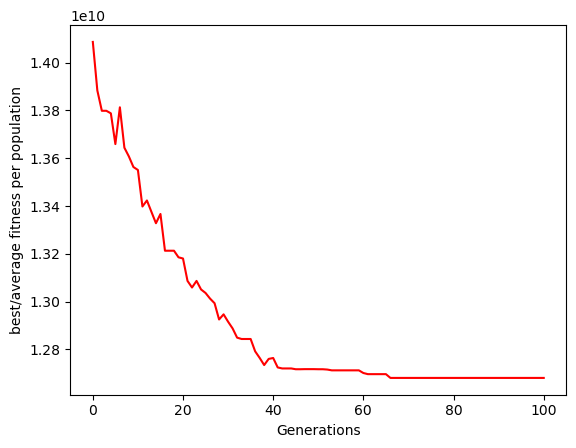

In [ ]:
plt.plot(logbook.select("min"), color='red')
# plt.plot(logbook.select("avg"), color='green')
plt.xlabel('Generations')
plt.ylabel('best/average fitness per population')
plt.show()

In [ ]:

res = factory.evaluateTruckSchedule(hof[0])
print(res)
print(hof[0]) #12297372635

TruckEvalSheet(total_truck_dist=126808.42560785009, total_truck=75, max_truck=6, truck_violation=0, penalty=0, total_cost=12680856060)
[3, 6, 5, 0, 8, 1, 9, 7, 11, 0, 12, 15, 4, 14, 10, 2, 0, 22, 21, 25, 16, 27, 19, 18, 26, 24, 28, 23, 20, 17, 13, 0, 33, 29, 0, 37, 30, 32, 34, 35, 38, 36, 31, 0, 42, 0, 50, 39, 40, 53, 54, 41, 52, 49, 43, 47, 48, 45, 44, 0, 55, 51, 0, 60, 62, 57, 46, 56, 0, 59, 0, 64, 63, 0, 68, 58, 61, 67, 72, 0, 77, 75, 65, 73, 70, 74, 76, 69, 71, 66, 0, 79, 78, 0, 82, 84, 83, 85, 80, 0, 89, 0, 81, 87, 91, 92, 86, 0, 88, 90, 93, 97, 99, 94, 0, 95, 103, 0, 100, 98, 105, 101, 0, 96, 106, 110, 111, 114, 102, 104, 109, 108, 112, 107, 0, 120, 116, 119, 115, 0, 118, 122, 124, 123, 113, 117, 125, 121, 0, 129, 128, 0, 130, 126, 134, 131, 0, 136, 132, 133, 0, 135, 137, 127, 142, 138, 141, 140, 139, 0, 147, 143, 144, 150, 149, 148, 146, 145, 0, 0, 0, 0, 0, 0]


In [ ]:
def mutExplore(individual: list[int], indpb: float) -> tuple[list[int]]:
	mut_func = [factory.mutateTechScramble, factory.mutateTechSwap]
	rand_func = random.choice(mut_func)
	return rand_func(individual, indpb)

def fitness(individual: list[int]) -> tuple[int]:
	buffer = factory.evaluateSchedule(individual)
	return (buffer.cal_cost(factory), )

In [ ]:
factory.resigterTruckScheduleRef(hof[0])
toolbox.register("individualInit", tools.initIterate, creator.individual, factory.scheduleInit)
toolbox.register("populationInit", tools.initRepeat, list, toolbox.individualInit)
toolbox.register("evaluate", fitness)
toolbox.register("mate", factory.crossoverTech)
toolbox.register("mutate", mutExplore, indpb=0.1)

In [ ]:
## build and run the GA
size = 200
starting_pop = toolbox.populationInit(size)
hof2 = tools.HallOfFame(5)

gen	nevals	min        	avg        
0  	200   	1.28006e+10	1.28006e+10
1  	165   	1.28006e+10	2.84117e+11
2  	157   	1.28006e+10	2.078e+11  
3  	151   	1.28006e+10	5.93955e+10
4  	173   	1.28006e+10	3.38539e+10
5  	168   	1.28006e+10	1.28007e+10
6  	155   	1.28006e+10	9.12505e+11
7  	173   	1.28006e+10	6.30696e+11
8  	166   	1.28006e+10	2.12727e+11
9  	152   	1.28006e+10	7.34814e+11
10 	150   	1.28006e+10	1.16863e+11
11 	161   	1.28006e+10	6.42505e+11
12 	160   	1.28006e+10	5.464e+11  
13 	171   	1.28006e+10	2.8408e+11 
14 	173   	1.28006e+10	7.95421e+11
15 	162   	1.28006e+10	4.52129e+11
16 	162   	1.28006e+10	5.88679e+11
17 	172   	1.28006e+10	5.28658e+11
18 	171   	1.28006e+10	7.34344e+11
19 	169   	1.28006e+10	2.23349e+11
20 	161   	1.28006e+10	9.61142e+10
21 	153   	1.28006e+10	3.46521e+11
22 	169   	1.28006e+10	1.32042e+11
23 	158   	1.28006e+10	5.95052e+11
24 	173   	1.28006e+10	1.4922e+11 
25 	164   	1.28006e+10	1.73689e+11
26 	163   	1.28006e+10	1.28007e+10
27 	174   	1.28006e+

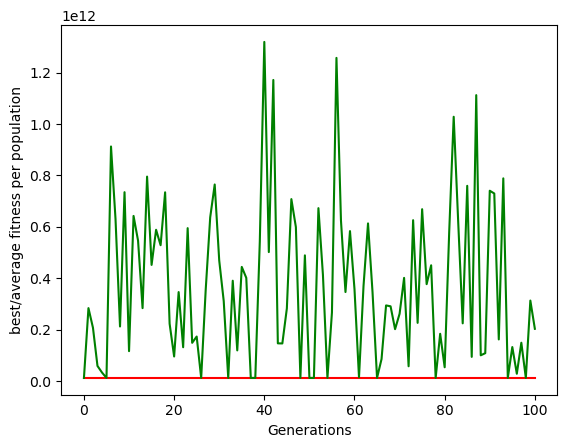

In [ ]:
p_cx = 0.75
p_mut = 1 - p_cx
iteration = 100

final_pop, logbook = algorithms.eaSimple(
    starting_pop,
    toolbox,
    p_cx,
    p_mut,
    iteration,
    stats,
    hof2,
    True
)

#print(f"best solution: {hof[0]}")

plt.plot(logbook.select("min"), color='red')
plt.plot(logbook.select("avg"), color='green')
plt.xlabel('Generations')
plt.ylabel('best/average fitness per population')
plt.show()

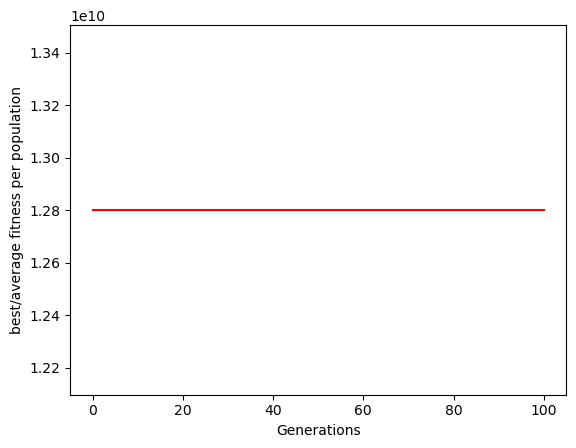

In [ ]:
plt.plot(logbook.select("min"), color='red')
plt.xlabel('Generations')
plt.ylabel('best/average fitness per population')
plt.show()

In [ ]:
eval = factory.evaluateSchedule(hof2[0])
print(eval)
print(eval.cal_cost(factory))
#12743912302

EvalSheet(truck=TruckEvalSheet(total_truck_dist=126808.42560785009, total_truck=80, max_truck=6, truck_violation=0, penalty=0, total_cost=12680856560), tech=TechEvalSheet(tech_violation=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], tech_penalty=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], total_tech_dist=10593.043941689251, no_tech_employed=33306977486266366156783, total_tech_deployed=138, idle_machine_cost=0, total_tech_penalty=0, total_cost=119775439))
12800631999
